In [19]:
import requests
from bs4 import BeautifulSoup

#import pandas
#dfs = pandas.read_html('http://rate.bot.com.tw/xrt/quote/l6m/USD')

url_ticket = 'https://sales.vscinemas.com.tw/VieShowTicket/Promote/PromoteConcession3'

url = 'https://sales.vscinemas.com.tw/VieShowTicket/?agree=on&cinemacode=16&txtSessionId=284473'
# payload = {
# 'CinemaId':'16',
# 'SessionTime':'8/20/2017 9:50:00 PM',
# 'MovieID':'HO00006436',
# 'lstOrderTicketType[0][HoCode]':'HO00000001',
# 'lstOrderTicketType[0][Qty]':'2' 
# }
payload = {
'cinemacode':'16',
'txtSessionId':'284132',
'Orders[OrderTickets][0][CinemaId]':'16',
'Orders[OrderTickets][0][SessionId]':'284132',
'Orders[OrderTickets][0][HoCode]':'HO00000001',
'Orders[OrderTickets][0][PriceCode]':'0063',
'Orders[OrderTickets][0][Qty]':'2',
'SessionTime:8/21/2017 12':'40:00 PM',
'MovieName':'(數位)模犯生'
}
res = requests.post(url_ticket,data=payload)
soup = BeautifulSoup(res.text,'html.parser')

print(soup)

In [27]:
import requests
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.101 Safari/537.36',
'Cookie':'ASP.NET_SessionId=mrmslj5cgj5lxe4g1klri10t; _gat=1; _ga=GA1.3.1430541524.1503192265; _gid=GA1.3.1394565657.1503192265'
}
res = requests.post('https://sales.vscinemas.com.tw/VieShowTicket/Home/SelectSeats', data = {}, headers = headers)

#res.text
dfs = pandas.read_html(res.text)
dfs

[               0
 0  全票  X 2 = 640
 1         合計 640,     0
 0   A
 1   B
 2   C
 3   D
 4   E
 5   F
 6   G
 7   H
 8   I
 9   J
 10  K,     0   1    2    3    4    5    6    7    8    9   ...     18    19    20  \
 0  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 1  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 2  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 3  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 4  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 5  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 6  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   NaN   NaN   
 7  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 8  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  17.0   
 9  NaN NaN  NaN  NaN  NaN  4.0  5.0  NaN  NaN  6.0  ...   15.0  16.0  1

## 資料庫操作

In [6]:
import sqlite3 as lite

con = lite.connect('test.sqlite') ## 如果不存在，會自動建立此檔案; 連線到資料庫
cur = con.cursor() ## 使用游標
cur.execute('SELECT SQLITE_VERSION()') ## 利用cursor 執行SQL指令
data = cur.fetchone() ## fetchone 一次截取一個結果
print(data)
con.close()

('3.14.2',)


In [7]:
with lite.connect('test.sqlite') as con:
    cur = con.cursor() ## 使用游標
    cur.execute('SELECT SQLITE_VERSION()') ## 利用cursor 執行SQL指令
    data = cur.fetchone() ## fetchone 一次截取一個結果
    print(data)

('3.14.2',)


In [12]:
import sqlite3 as lite
with lite.connect('test.sqlite') as con:
    cur = con.cursor() ## 使用游標
    cur.execute('DROP TABLE IF EXISTS PhoneAddress') ## 利用cursor 執行SQL指令
    cur.execute('CREATE TABLE PhoneAddress(\
                        phone CHAR(10) PRIMARY KEY,\
                        address TEXT,\
                        name TEXT unique,\
                        age INT NOT NULL)')
    cur.execute('INSERT INTO PhoneAddress VALUES("0912555666","taiwan","hank",28)')

## 使用Pandas 操作 Sqlite

In [13]:
import sqlite3 as lite
import pandas
employee = [{'name':'Mary','age':23,'gender':'F'},{'name':'Hank','age':28,'gender':'F'}]

df = pandas.DataFrame(employee)

with lite.connect('test.sqlite') as db:
    df.to_sql(name='employee',index=False,con=db,if_exists='replace')

In [17]:
import pandas
dfs = pandas.read_html('http://rate.bot.com.tw/xrt/quote/l6m/USD')
df = dfs[0]
df.head()

掛牌日期                幣別    現金匯率 Unnamed: 4_level_0               即期匯率  \
         本行買入      本行賣出    本行買入    本行賣出 Unnamed: 4_level_1 Unnamed: 5_level_1   
0  2017/08/18  美金 (USD)  29.970  30.512             30.270             30.370   
1  2017/08/17  美金 (USD)  29.955  30.497             30.255             30.355   
2  2017/08/16  美金 (USD)  30.000  30.542             30.300             30.400   
3  2017/08/15  美金 (USD)  29.935  30.477             30.235             30.335   
4  2017/08/14  美金 (USD)  29.950  30.492             30.250             30.350   

  Unnamed: 6_level_0  
  Unnamed: 6_level_1  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

## 資料庫實例

In [29]:
import pandas

df = pandas.read_csv('rent_591_sample.csv',index_col=0)
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [30]:
def normalizePrice(price):
    #return int(price.replace('元/月','').replace(',',''))
    return int(price.strip('元/月').replace(',',''))
    #print (int((price.strip('元/月').replace(',',''))))
    #return int(''.joint(price.strip('元/月').split(',')))
print(normalizePrice('4,500'))

4500


In [40]:
df['price'] = df['price'].map(normalizePrice)
df['price']

0          4500
1          7500
2         11000
3          5000
4          5000
5         22000
6          6500
7          3000
8          6800
9         17000
10        10000
11        10000
12        16000
13         7500
14        11000
15        25000
16        15000
17        23000
18         3000
19         3900
20        70000
21         5000
22         7000
23         5500
24         6000
25         5400
26        50000
27         3200
28        39000
29         6500
          ...  
70285     12800
70286      9500
70287      5000
70288     14000
70289     14000
70290     16000
70291     24000
70292      7500
70293     20000
70294     15000
70295     12000
70296     25000
70297      9000
70298      4000
70299      7800
70300      5800
70301      5000
70302    170000
70303      4200
70304      8500
70305      5800
70306    135000
70307      6499
70308      8000
70309      6799
70310     13500
70311      8800
70312      5999
70313      3300
70314     17000
Name: price, Length: 703

In [38]:
df['btype']= df['building_use'].map(lambda e: str(e).split('/')[0])
df['buse'] = df['building_use'].map(lambda e: str(e).split('/')[1] if '/' in str(e) else None)
#df['building_use']
df

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,btype,buse
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.00,透天厝/獨立套房,22.878436,120.250810,透天厝,獨立套房
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.00,透天厝/獨立套房,25.081558,121.461868,透天厝,獨立套房
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.00,電梯大樓/分租套房,25.010293,121.511328,電梯大樓,分租套房
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.00,透天厝/獨立套房,22.551346,120.538032,透天厝,獨立套房
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.00,透天厝/分租套房,25.043652,121.141518,透天厝,分租套房
5,https://rent.591.com.tw/rent-detail-1633388.html,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,"22,000元/月",2房1廳1衛1陽臺,24.00,電梯大樓/整層住家,25.136948,121.462779,電梯大樓,整層住家
6,https://rent.591.com.tw/rent-detail-1299940.html,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,"6,500元/月",NaN,7.00,電梯大樓/雅房,24.871279,120.986334,電梯大樓,雅房
7,https://rent.591.com.tw/rent-detail-1051432.html,2017-05-14,附網路電視包水費!離逢甲商圈近,台中市西屯區西屯路二段,3F/5F,"3,000元/月",NaN,4.00,透天厝/雅房,24.173195,120.645027,透天厝,雅房
8,https://rent.591.com.tw/rent-detail-2039449.html,2017-05-13,逢甲大學-有陽台的套房(獨立水電錶),台中市西屯區至善路,10F/14F,"6,800元/月",NaN,9.00,電梯大樓/獨立套房,24.178854,120.644530,電梯大樓,獨立套房
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,"17,000元/月",2房1廳2衛2陽臺,32.00,電梯大樓/整層住家,25.130052,121.720788,電梯大樓,整層住家


In [41]:
with lite.connect('house.sqlite') as db:
    df.to_sql('rent_591',index=None,con=db,if_exists='replace')

In [48]:
import pandas
with lite.connect('house.sqlite') as db:
    df2 = pandas.read_sql_query("select title, building_area, price from rent_591",con=db)
df2

,title,building_area,price
0,套房出租-近東方學院(六~八月可入住),6.00,4500
1,好房子【聰明的你、妳快來租吧】,10.00,7500
2,陽台大套房(獨立洗衣機)近頂溪捷運站,8.00,11000
3,火車站附近~~優質套房,8.00,5000
4,觀音四維路優質陽台套房,7.00,5000
5,近捷運，採光佳，有景觀，全新家電裝潢,24.00,22000
6,近明新、台元/全新完工/飯店式電梯套房,7.00,6500
7,附網路電視包水費!離逢甲商圈近,4.00,3000
8,逢甲大學-有陽台的套房(獨立水電錶),9.00,6800
9,大衛營優質社區管理好，交通便利、裝潢佳,32.00,17000


## 讀取股價資訊

In [49]:
!pip install pandas_datareader

  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\76\fb\0d\1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
  Running setup.py bdist_wheel for requests-file: started
  Running setup.py bdist_wheel for requests-file: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\3e\34\3a\c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
Successfully built requests-ftp requests-file


In [73]:
import pandas_datareader
#google = goog
#microsoft = MSFT
#apple = aapl
df = pandas_datareader.DataReader(['MSFT','GOOG','AAPL','AMZN','FB'],data_source='google',start='2014-01-01')['Close']
df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-01-02,79.02,397.97,54.71,556.00,37.16
2014-01-03,77.28,396.44,54.56,551.95,36.91
2014-01-06,77.70,393.63,57.20,558.10,36.13
2014-01-07,77.15,398.03,57.92,568.86,36.41
2014-01-08,77.64,401.92,58.23,570.04,35.76


In [55]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


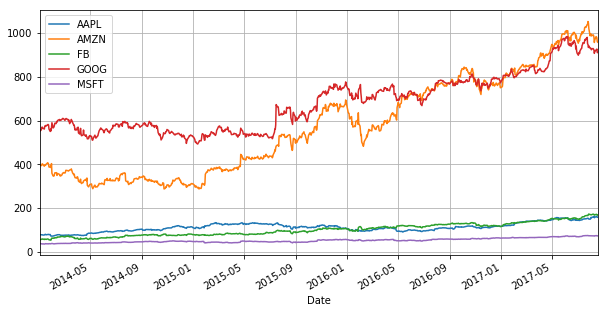

In [75]:
df.plot(kind='line',figsize=[10,5],legend = True, grid= True)

In [85]:
df = pandas_datareader.DataReader('AAPL',data_source='google',start='2014-01-01')
df.head()
df.ix[df.index >= '2016-01-01',['Volume','Close']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,Volume,Close
Date,,
2016-01-04,67281190,105.35
2016-01-05,55790992,102.71
2016-01-06,68457388,100.70
2016-01-07,81094428,96.45
2016-01-08,70798016,96.96


In [86]:
df['diff'] = df['Close'] - df['Open']

In [87]:
df['rise'] = df['diff'] >0

In [88]:
df['fall'] = df['diff'] <=0

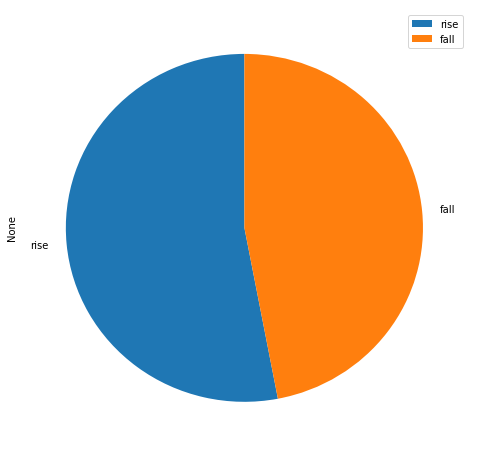

In [98]:
df.head()
df[['rise','fall']].sum().plot(kind='pie',figsize=[8,8],startangle=90,legend=True,counterclock = True)

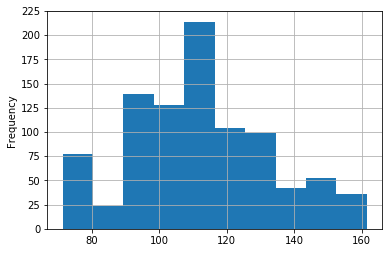

In [100]:
df['Close'].plot(kind='hist',grid = True)

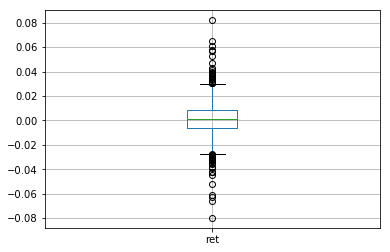

In [101]:
df['ret'] = df['Close'].pct_change(1)
df['ret'].plot(kind='box',grid = True)